# **IMMUNIZATION BEHAVIOUR MODELING**

# BUSINESS UNDERSTANDING

## BACKGROUND

Seasonal influenza and emerging novel strains such as H1N1 represent persistent and evolving public health challenges worldwide. Vaccination is universally recognized as the most effective preventive measure, reducing both disease burden and transmission. However, despite widespread vaccine availability and public health recommendations, uptake remains inconsistent across populations.

Vaccination behavior is influenced by a complex interplay of factors: demographic characteristics (e.g age, gender, socioeconomic status), health-related behaviors (e.g doctor visits, smoking status), structural barriers (e.g healthcare access, insurance coverage), and individual-level psychosocial factors such as risk perception, trust in vaccines, and personal beliefs.

By systematically analyzing these determinants, predictive models can provide deep insight into vaccination behavior. Such insights can empower public health agencies, healthcare providers, and policymakers to design data-driven, tailored interventions that improve vaccination uptake and ultimately reduce preventable illness, hospitalization, and healthcare costs.

## BUSINESS PROBLEM

Although flu vaccines are widely available and affordable in many contexts, a substantial portion of the population opts out of vaccination. This results in:

- Preventable illness – increased flu incidence and associated complications.
- Healthcare system strain – higher hospitalization rates, especially among vulnerable groups.
- Economic costs – productivity losses, absenteeism, and higher treatment expenditures.

The central business problem is:

**Can we leverage data on demographics, health access, personal beliefs, and risk perceptions to predict which individuals are most likely—or least likely—to get vaccinated?**

A reliable predictive framework can help:

- Pinpoint at-risk groups with consistently low uptake.
- Inform targeted public health messaging and education.
- Optimize resource allocation for vaccination programs.
- Shape policy decisions for more effective preventive healthcare strategies.

## OBJECTIVES

**Primary Objective:**

Build a robust predictive model that estimates the probability of an individual receiving a flu vaccine (focusing initially on H1N1, then generalizing to seasonal flu).

**Secondary Objectives:**

- Identify and quantify key drivers of vaccination decisions.
- Translate analytical insights into actionable strategies for stakeholders.
- Provide evidence-based recommendations for improving outreach and public health outcomes.

## SCOPE

This study will use the 2009 National H1N1 Flu Survey (NHFS) dataset, a comprehensive, nationally representative dataset collected during the H1N1 influenza pandemic. It contains rich information on respondents’ demographics, health access, risk perceptions, and self-reported vaccination status.

The scope will focus on binary outcomes (vaccinated vs. not vaccinated) for H1N1 vaccination, with possible extension to seasonal flu uptake.

Key features to be analyzed:

1. Demographics: age, gender, education, income, race/ethnicity.
2. Health access and behaviors: doctor visits, health insurance, chronic conditions.
3. Attitudinal variables: perceived vaccine effectiveness, trust in medical advice, risk perception of flu.
4. Outcome variable: H1N1 vaccine uptake (binary).

## STAKEHOLDERS

- **Public Health Agencies** – Use insights to design targeted vaccination campaigns and maximize population-level coverage.
- **Healthcare Providers** – Understand patient hesitancy, improve communication strategies, and build trust in vaccine efficacy.
- **Policy Makers** – Allocate resources and funding effectively to interventions with the greatest public health impact.
- **Health Researchers and Epidemiologists** – Advance the understanding of behavioral determinants of preventive care and inform future studies.
- **Insurance Providers & Employers** – Forecast vaccine uptake among covered populations, design incentive programs, and mitigate healthcare costs.

## VALUE

The project delivers both analytical value and practical value:

1. Risk Stratification – Identify population subgroups most resistant to vaccination.
2. Behavioral Insights – Highlight the psychosocial and demographic factors that most strongly shape decisions.
3. Resource Optimization – Guide allocation of vaccines, outreach, and funding to maximize effectiveness.
4. Evidence-based Policy – Provide scientific justification for tailored interventions.
5. Public Health Impact – Improve immunization rates, reduce disease spread, lower hospitalizations, and minimize healthcare costs.

Ultimately, the value lies in transforming raw data into actionable intelligence that supports more equitable, efficient, and impactful vaccination strategies.

## SUCCESS METRICS

1. Analytical Success

    - Develop a predictive model that achieves at least 75% accuracy.
    - Ensure balanced performance across all key evaluation metrics, with AUC, F1-score, precision, and recall each ≥ 75%.
    - Validate robustness and generalizability through rigorous cross-validation and independent test sets.

2. Business Success

    - Translate model predictions into practical, actionable insights that directly support vaccination campaigns.
    - Provide results in a form that is accessible and usable to policymakers, healthcare providers, and public health agencies.

3. Explainability & Interpretability

    - Clearly identify the most influential predictors of vaccination behavior, such as demographic factors, health access, and risk perceptions.
    - Apply explainable AI techniques (e.g., feature importance, SHAP values) to ensure stakeholders can trust and act on the findings.

4. Public Health Impact

    - Demonstrate the potential for increased vaccination uptake within under-immunized populations if recommendations are applied.
    - Highlight the resulting reduction in preventable illness, hospitalizations, and healthcare costs, reinforcing the model’s societal value.

# DATA UNDERSTANDING

This project uses the Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines dataset, made publicly available by DrivenData in partnership with the U.S. National 2009 H1N1 Flu Survey (NHFS). The dataset was collected during the 2009 influenza pandemic and provides a nationally representative sample of U.S. residents, capturing both demographic and behavioral determinants of vaccination decisions.

The dataset is split into three parts:

- Training set (training_set_features.csv & training_set_labels.csv): Includes feature data and target vaccination outcomes for model development.
- Test set (test_set_features.csv): Feature data for evaluating predictions on unseen individuals.

At this stage, we’re focusing on:  

- Dataset overview: Rows, columns, data types, and overall structure.  
- Data quality check: Missing values, outliers, and duplicates that could distort analysis.  
- Feature exploration (train only): Distributions of numeric and categorical features.  

Scalpels out. We’re not curing patients, we’re interrogating variables, and some of them won’t survive the operation.

## IMPORT ALL RELEVANT LIBRARIES

In [421]:
# Utilities
import warnings
warnings.filterwarnings('ignore')

# Mathematical Operations
import numpy as np

# Data Manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# Datetime
import datetime

# Statistics & Scientific Computing
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import randint
from scipy.stats import chi2_contingency

# Machine Learning - Preprocessing
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler
)

# Machine Learning - Model Selection & Evaluation
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    balanced_accuracy_score,
    f1_score
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Advanced Models
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.utils.class_weight import compute_class_weight

# Handling Class Imbalance
from imblearn.over_sampling import SMOTE

Now we load the datasets

In [422]:
# Training values (features)
train_values_df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\Predicting-H1N1-and-Seasonal-Flu-Vaccines\\Data\\training_set_features.csv")

# Training labels (targets)
train_labels_df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\Predicting-H1N1-and-Seasonal-Flu-Vaccines\\Data\\training_set_labels.csv")

# Test values (features only)
test_df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\Predicting-H1N1-and-Seasonal-Flu-Vaccines\\Data\\test_set_features.csv")

Merge train datasets into one consolidated dataset

In [423]:
# Merge training features with labels
train_data = pd.merge(train_values_df, train_labels_df, on="respondent_id", how="inner")

# Print dataset
train_data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


Preview the test data

In [424]:
# Check test dataset
test_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


*Observation:* 

- The test set does not contain the target columns (h1n1_vaccine and seasonal_vaccine). Instead, it represents a continuation of the training data, providing only feature information. 
- Because of this, a traditional merge with the training set is not possible.

**Decision:**

For exploratory data analysis (EDA), I will focus exclusively on the training dataset. This is because only the training set contains the target variables (h1n1_vaccine and seasonal_vaccine), which are essential for understanding class balance, target-feature relationships, and the overall predictive landscape.

Although the training and test sets can be concatenated for unified preprocessing later, the absence of labels in the test set makes it unsuitable for EDA. Keeping the datasets separate at this stage ensures that insights are derived only from labeled data, avoiding bias or misinterpretation.

In [425]:
# Check columns
train_data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

The following are the column descriptions of the column names:

| Column Name                   | Description                                                                 |
| ----------------------------- | --------------------------------------------------------------------------- |
| respondent_id               | Unique identifier for each survey respondent.                               |
| h1n1_concern                | Self-reported level of concern about H1N1 influenza.                        |
| h1n1_knowledge              | Self-reported knowledge/awareness about H1N1.                               |
| behavioral_antiviral_meds   | Whether respondent has taken or would take antiviral medication.            |
| behavioral_avoidance        | Whether respondent avoided places/people to reduce infection risk.          |
| behavioral_face_mask        | Whether respondent wore a face mask to prevent infection.                   |
| behavioral_wash_hands       | Whether respondent increased hand-washing as prevention.                    |
| behavioral_large_gatherings | Whether respondent avoided large gatherings.                                |
| behavioral_outside_home     | Whether respondent limited time spent outside the home.                     |
| behavioral_touch_face       | Whether respondent tends to touch their face (eyes/nose/mouth).             |
| doctor_recc_h1n1            | Whether a doctor recommended the H1N1 vaccine to the respondent.            |
| doctor_recc_seasonal        | Whether a doctor recommended the seasonal flu vaccine to the respondent.    |
| chronic_med_condition       | Whether respondent has a chronic medical condition.                         |
| child_under_6_months        | Whether there is a child under 6 months in the household.                   |
| health_worker               | Whether the respondent works in health care.                                |
| health_insurance            | Whether the respondent has health insurance.                                |
| opinion_h1n1_vacc_effective | Belief about the effectiveness of the H1N1 vaccine.                         |
| opinion_h1n1_risk           | Perceived personal risk of getting H1N1.                                    |
| opinion_h1n1_sick_from_vacc | Belief that the H1N1 vaccine can make people sick.                          |
| opinion_seas_vacc_effective | Belief about the effectiveness of the seasonal flu vaccine.                 |
| opinion_seas_risk           | Perceived personal risk of getting seasonal flu.                            |
| opinion_seas_sick_from_vacc | Belief that the seasonal vaccine can make people sick.                      |
| age_group                   | Age category of the respondent (age buckets).                               |
| education                   | Highest education level attained.                                           |
| race                        | Respondent’s race / ethnicity.                                              |
| sex                         | Respondent’s gender.                                                        |
| income_poverty              | Income level relative to poverty threshold.                                 |
| marital_status              | Marital status of the respondent.                                           |
| rent_or_own                 | Housing status: rent or own.                                                |
| employment_status           | Current employment status (employed, unemployed, not in labor force).       |
| hhs_geo_region              | US Health and Human Services(HHS) geographic region of the respondent.                                 |
| census_msa                  | Metropolitan Statistical Area classification (urban/rural indicator).       |
| household_adults            | Number of adults in the household.                                          |
| household_children          | Number of children in the household.                                        |
| employment_industry         | Industry where respondent is employed.                                      |
| employment_occupation       | Respondent’s occupation.                                                    |
| h1n1_vaccine                | **Target** — whether respondent received the H1N1 vaccine (binary).         |
| seasonal_vaccine            | **Target** — whether respondent received the seasonal flu vaccine (binary). |


In [426]:
# Drop unnecessary columns
train_data.drop(columns = ['respondent_id'], inplace = True)
test_df.drop(columns = ['respondent_id'], inplace = True)

In [427]:
# Check dataset shape
print(f"The dataset contains {train_data.shape[0]} records and {train_data.shape[1]} features.")

The dataset contains 26707 records and 37 features.


In [428]:
# Get metadata
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [429]:
# Check number of unique values in each column
print("Unique values in training set features:")
train_data.nunique()

Unique values in training set features:


h1n1_concern                    4
h1n1_knowledge                  3
behavioral_antiviral_meds       2
behavioral_avoidance            2
behavioral_face_mask            2
behavioral_wash_hands           2
behavioral_large_gatherings     2
behavioral_outside_home         2
behavioral_touch_face           2
doctor_recc_h1n1                2
doctor_recc_seasonal            2
chronic_med_condition           2
child_under_6_months            2
health_worker                   2
health_insurance                2
opinion_h1n1_vacc_effective     5
opinion_h1n1_risk               5
opinion_h1n1_sick_from_vacc     5
opinion_seas_vacc_effective     5
opinion_seas_risk               5
opinion_seas_sick_from_vacc     5
age_group                       5
education                       4
race                            4
sex                             2
income_poverty                  3
marital_status                  2
rent_or_own                     2
employment_status               3
hhs_geo_region

## FEATURE EXPLORATION

### 1. NUMERICAL FEATURES

In [430]:
# Get numerical features
train_data.select_dtypes(include = 'number').columns.tolist()

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'h1n1_vaccine',
 'seasonal_vaccine']

In [431]:
# Get statistical summary of numerical features
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,24547.0,0.220312,0.414466,0.0,0.0,0.0,0.0,1.0


Visualise for better view

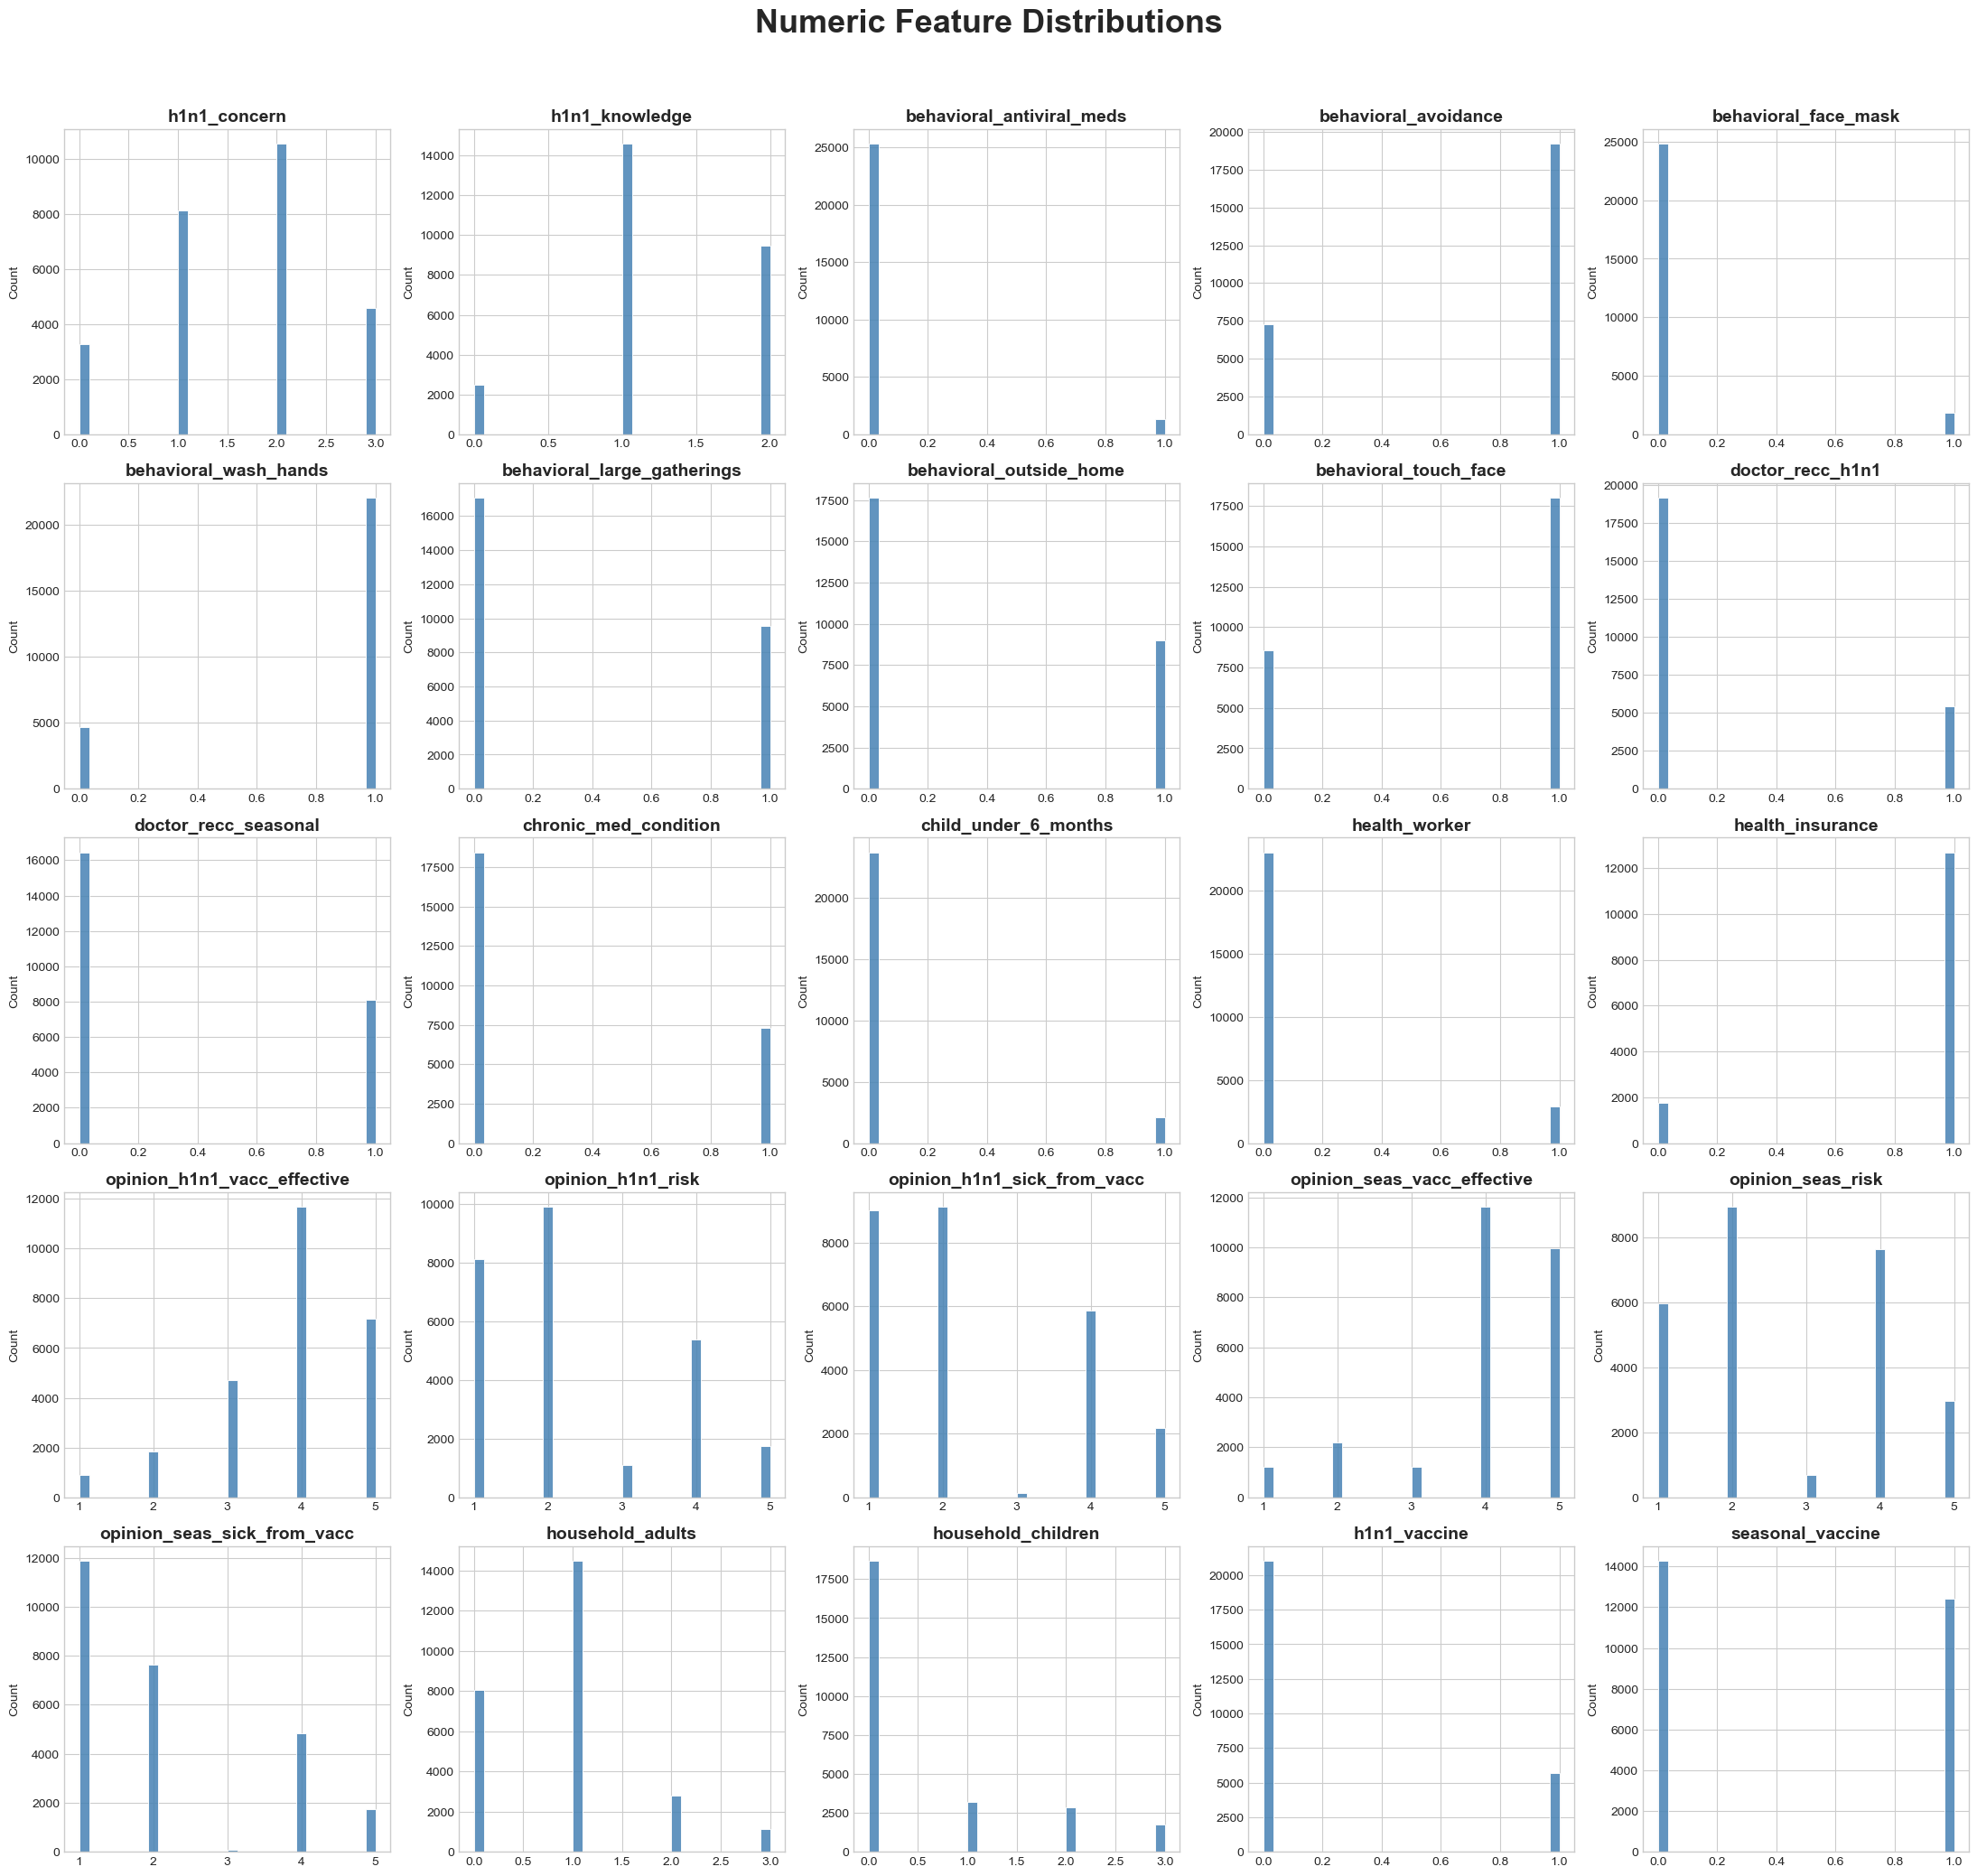

In [432]:
# Pick numeric columns only
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Set the plot grid
n_cols = 5 
n_rows = int(len(num_cols) / n_cols) + 1

plt.figure(figsize=(22, 4*n_rows))
plt.suptitle("Numeric Feature Distributions", fontsize=26, fontweight='bold', y=1.02)

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(
        data=train_data,
        x=col,
        bins=30,         
        color='steelblue',
        edgecolor='white',
        alpha=0.85
    )
    
    plt.title(col, fontsize=14, weight='bold')
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

*Observation:*

Ordinal Attitudinal Features *(h1n1_concern, h1n1_knowledge, opinions…)*
- Concern and knowledge are skewed toward lower/mid categories *(means ~1.2–1.6)*.  
- Opinion-based features (effectiveness, risk, sick-from-vaccine) span 1–5 Likert scales and show healthy variation:  
  - Effectiveness scores lean high *(means ~3.8–4.0)*.  
  - Risk perception is more spread out *(mean ~2.3–2.7, wide std ~1.3)*.  
  - Misconceptions (“getting sick from vaccines”) also vary *(mean ~2.1–2.3, std >1.3)*.  
- Attitudinal diversity is strong, perfect fuel for predictive modeling.  

Behavioral Indicators *(binary 0/1)*
- Most are sparse behaviors:  
  - Antiviral meds use (5%)  
  - Face mask use (7%)  
  - Avoidance (72%)  
  - Wash hands (83%)  
- Doctor recommendations are notably low: **22% (H1N1), 33% (seasonal)**.  
- Classic public health pattern: preventive behavior isn’t evenly adopted, and **doctor guidance seems a bottleneck**.  

Household & Demographic Proxies
- Adults in household: median = 1, right tail to 3+.  
- Children in household: median = 0, but non-trivial share with 1–3 kids.  
- Household structure may interact with risk perception (parents with kids often show higher vaccine uptake).  

Health & Access Variables
- Chronic conditions: 28%.  
- Health workers: ~11%.  
- Health insurance: recorded for ~14.4k respondents (missing >12k). Among those, ~88% insured.  
- Missingness itself may be informative (e.g uninsured skipping survey items).  

Target Variables
- **H1N1 vaccine uptake**: 21%.  
- **Seasonal vaccine uptake**: 46.5%.  

### CHECK FOR OUTLIERS

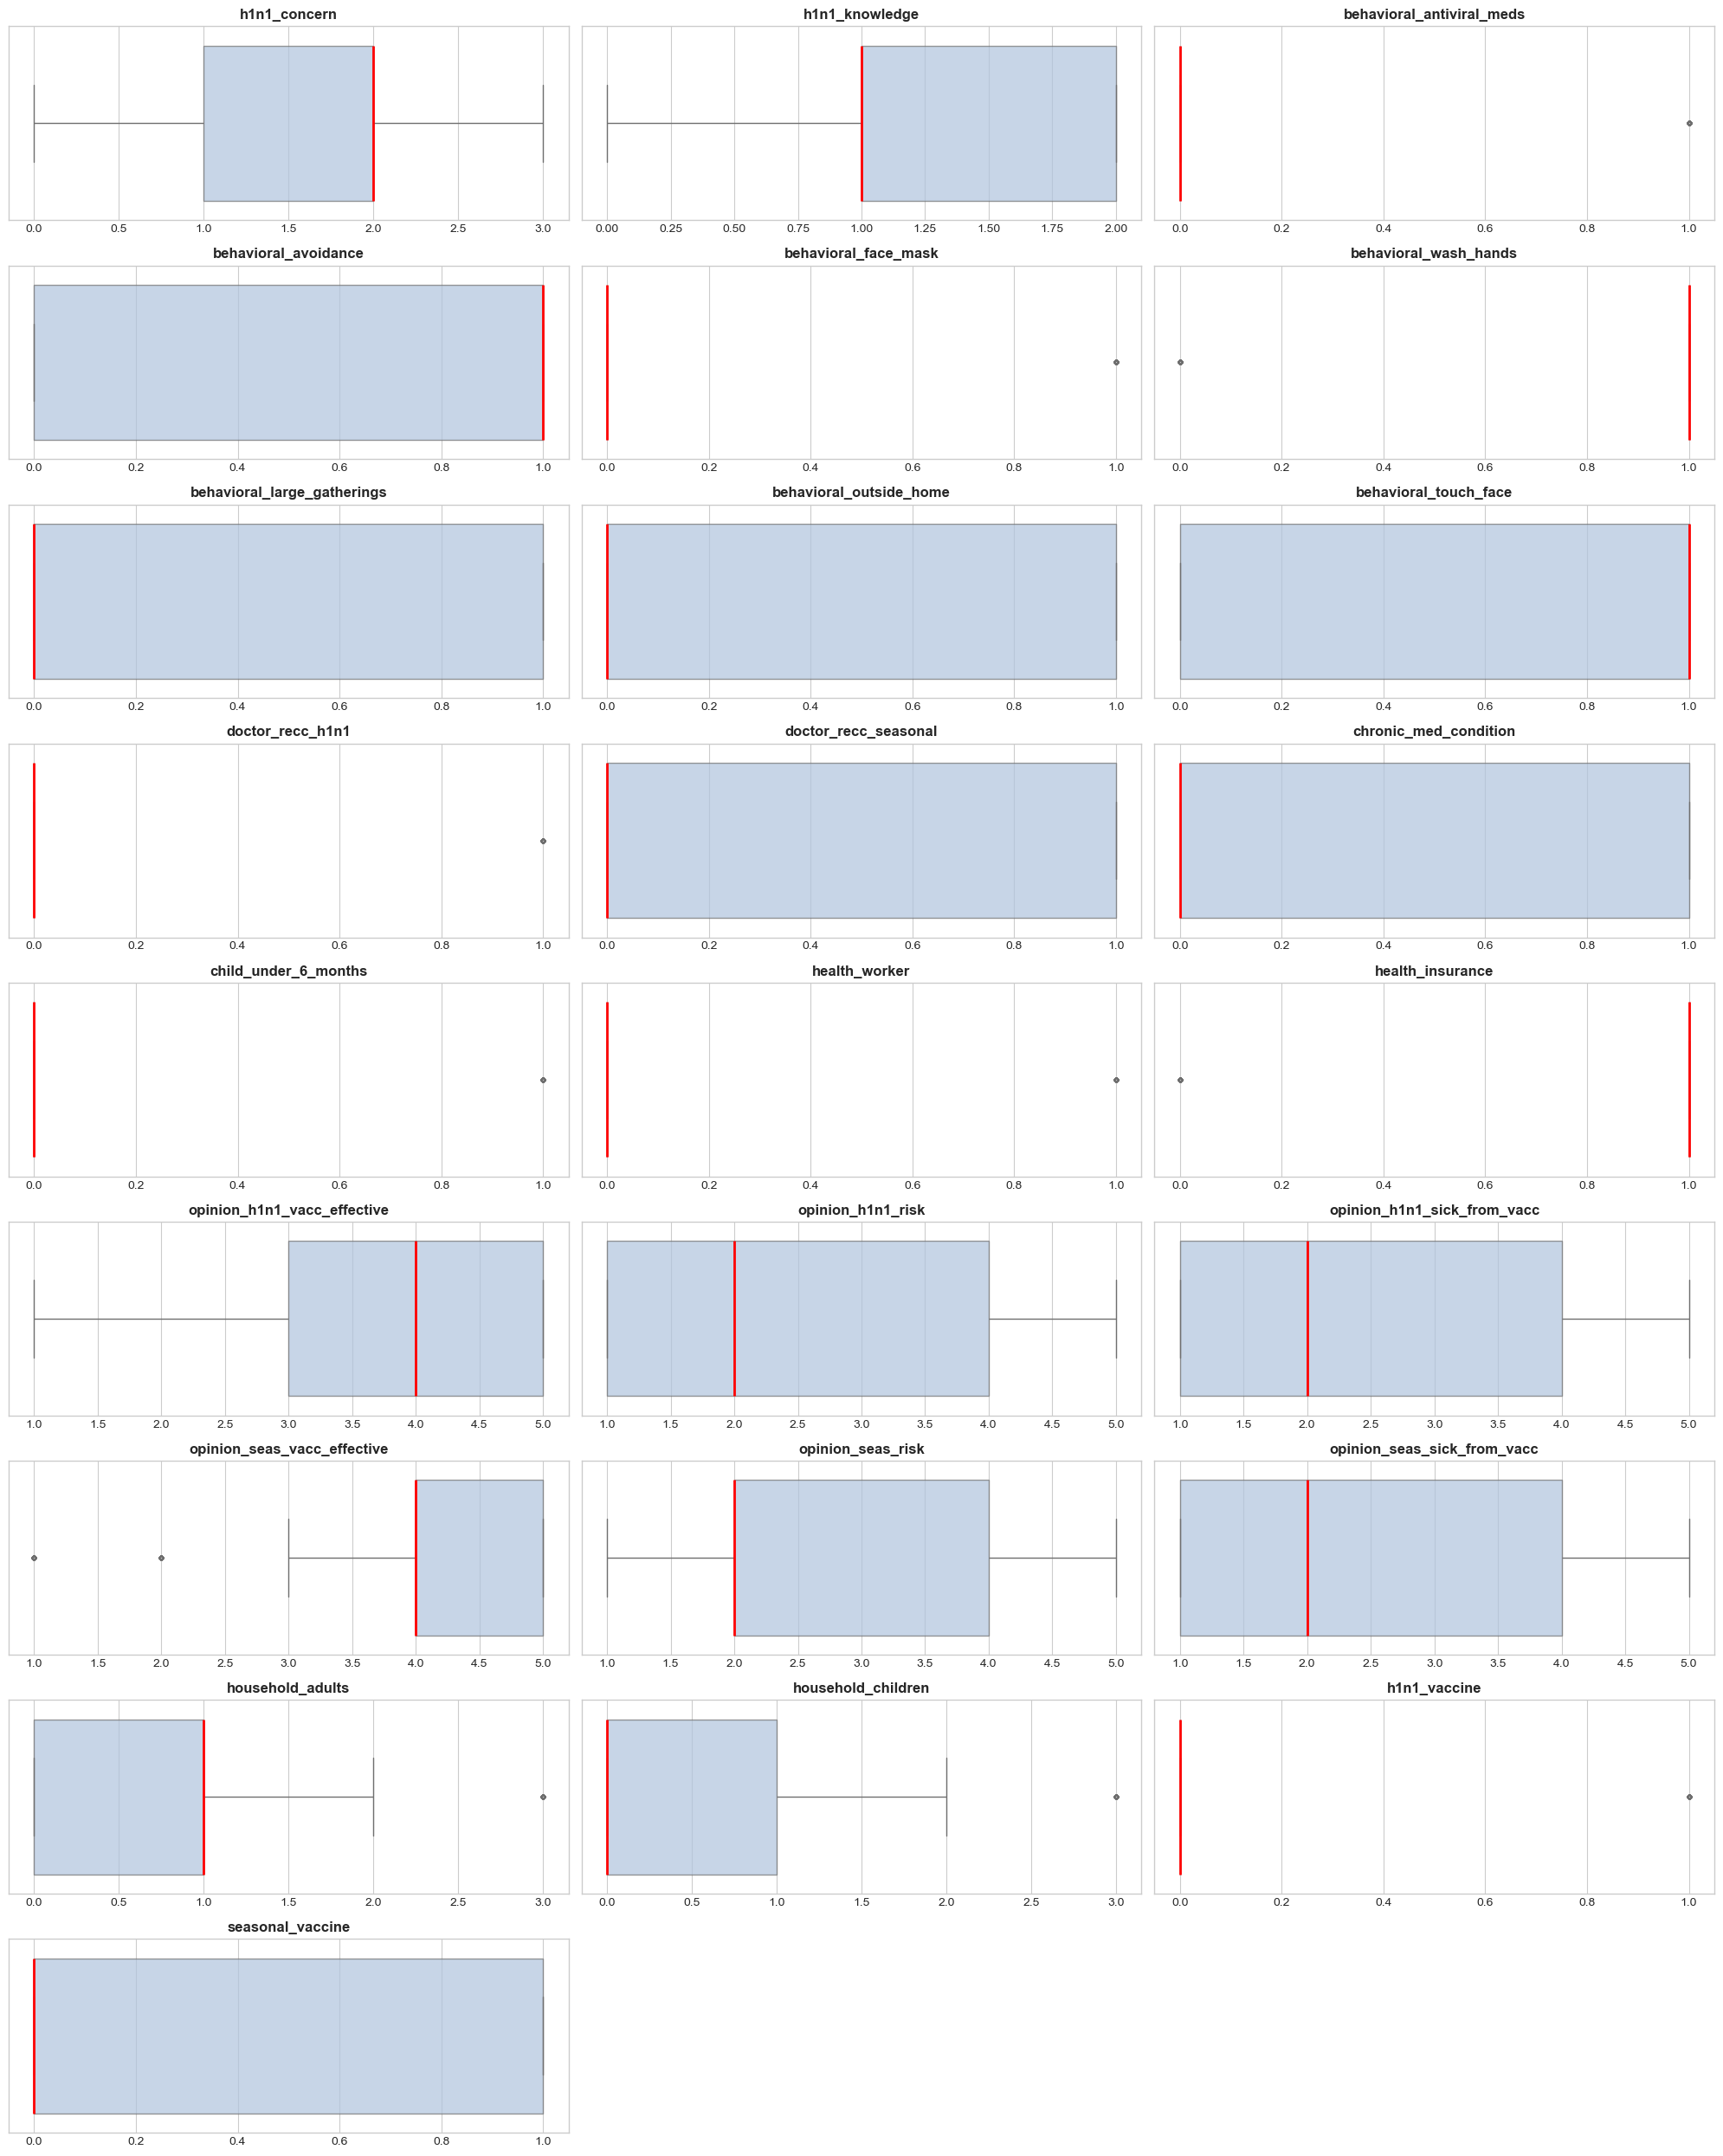

In [433]:
# Select numeric features only
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 25))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.boxplot(
        x=train_data[col],
        color="skyblue",
        fliersize=3,
        linewidth=1,
        boxprops=dict(alpha=0.7, facecolor="lightsteelblue"),
        medianprops=dict(color="red", linewidth=2)
    )
    plt.title(col, fontsize=12, fontweight="bold")
    plt.xlabel("")

plt.tight_layout()
plt.show()

*Observation:* All values are within the expected ranges

### 2. CATEGORICAL FEATURES

In [434]:
# Get categorical columns
train_data.select_dtypes(include = 'object').columns.tolist()

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [435]:
# Get descriptive statistics for categorical columns
train_data.describe(include = 'object').T

,count,unique,top,freq
age_group,26707,5,65+ Years,6843
education,25300,4,College Graduate,10097
race,26707,4,White,21222
sex,26707,2,Female,15858
income_poverty,22284,3,"<= $75,000, Above Poverty",12777
marital_status,25299,2,Married,13555
rent_or_own,24665,2,Own,18736
employment_status,25244,3,Employed,13560
hhs_geo_region,26707,10,lzgpxyit,4297
census_msa,26707,3,"MSA, Not Principle City",11645


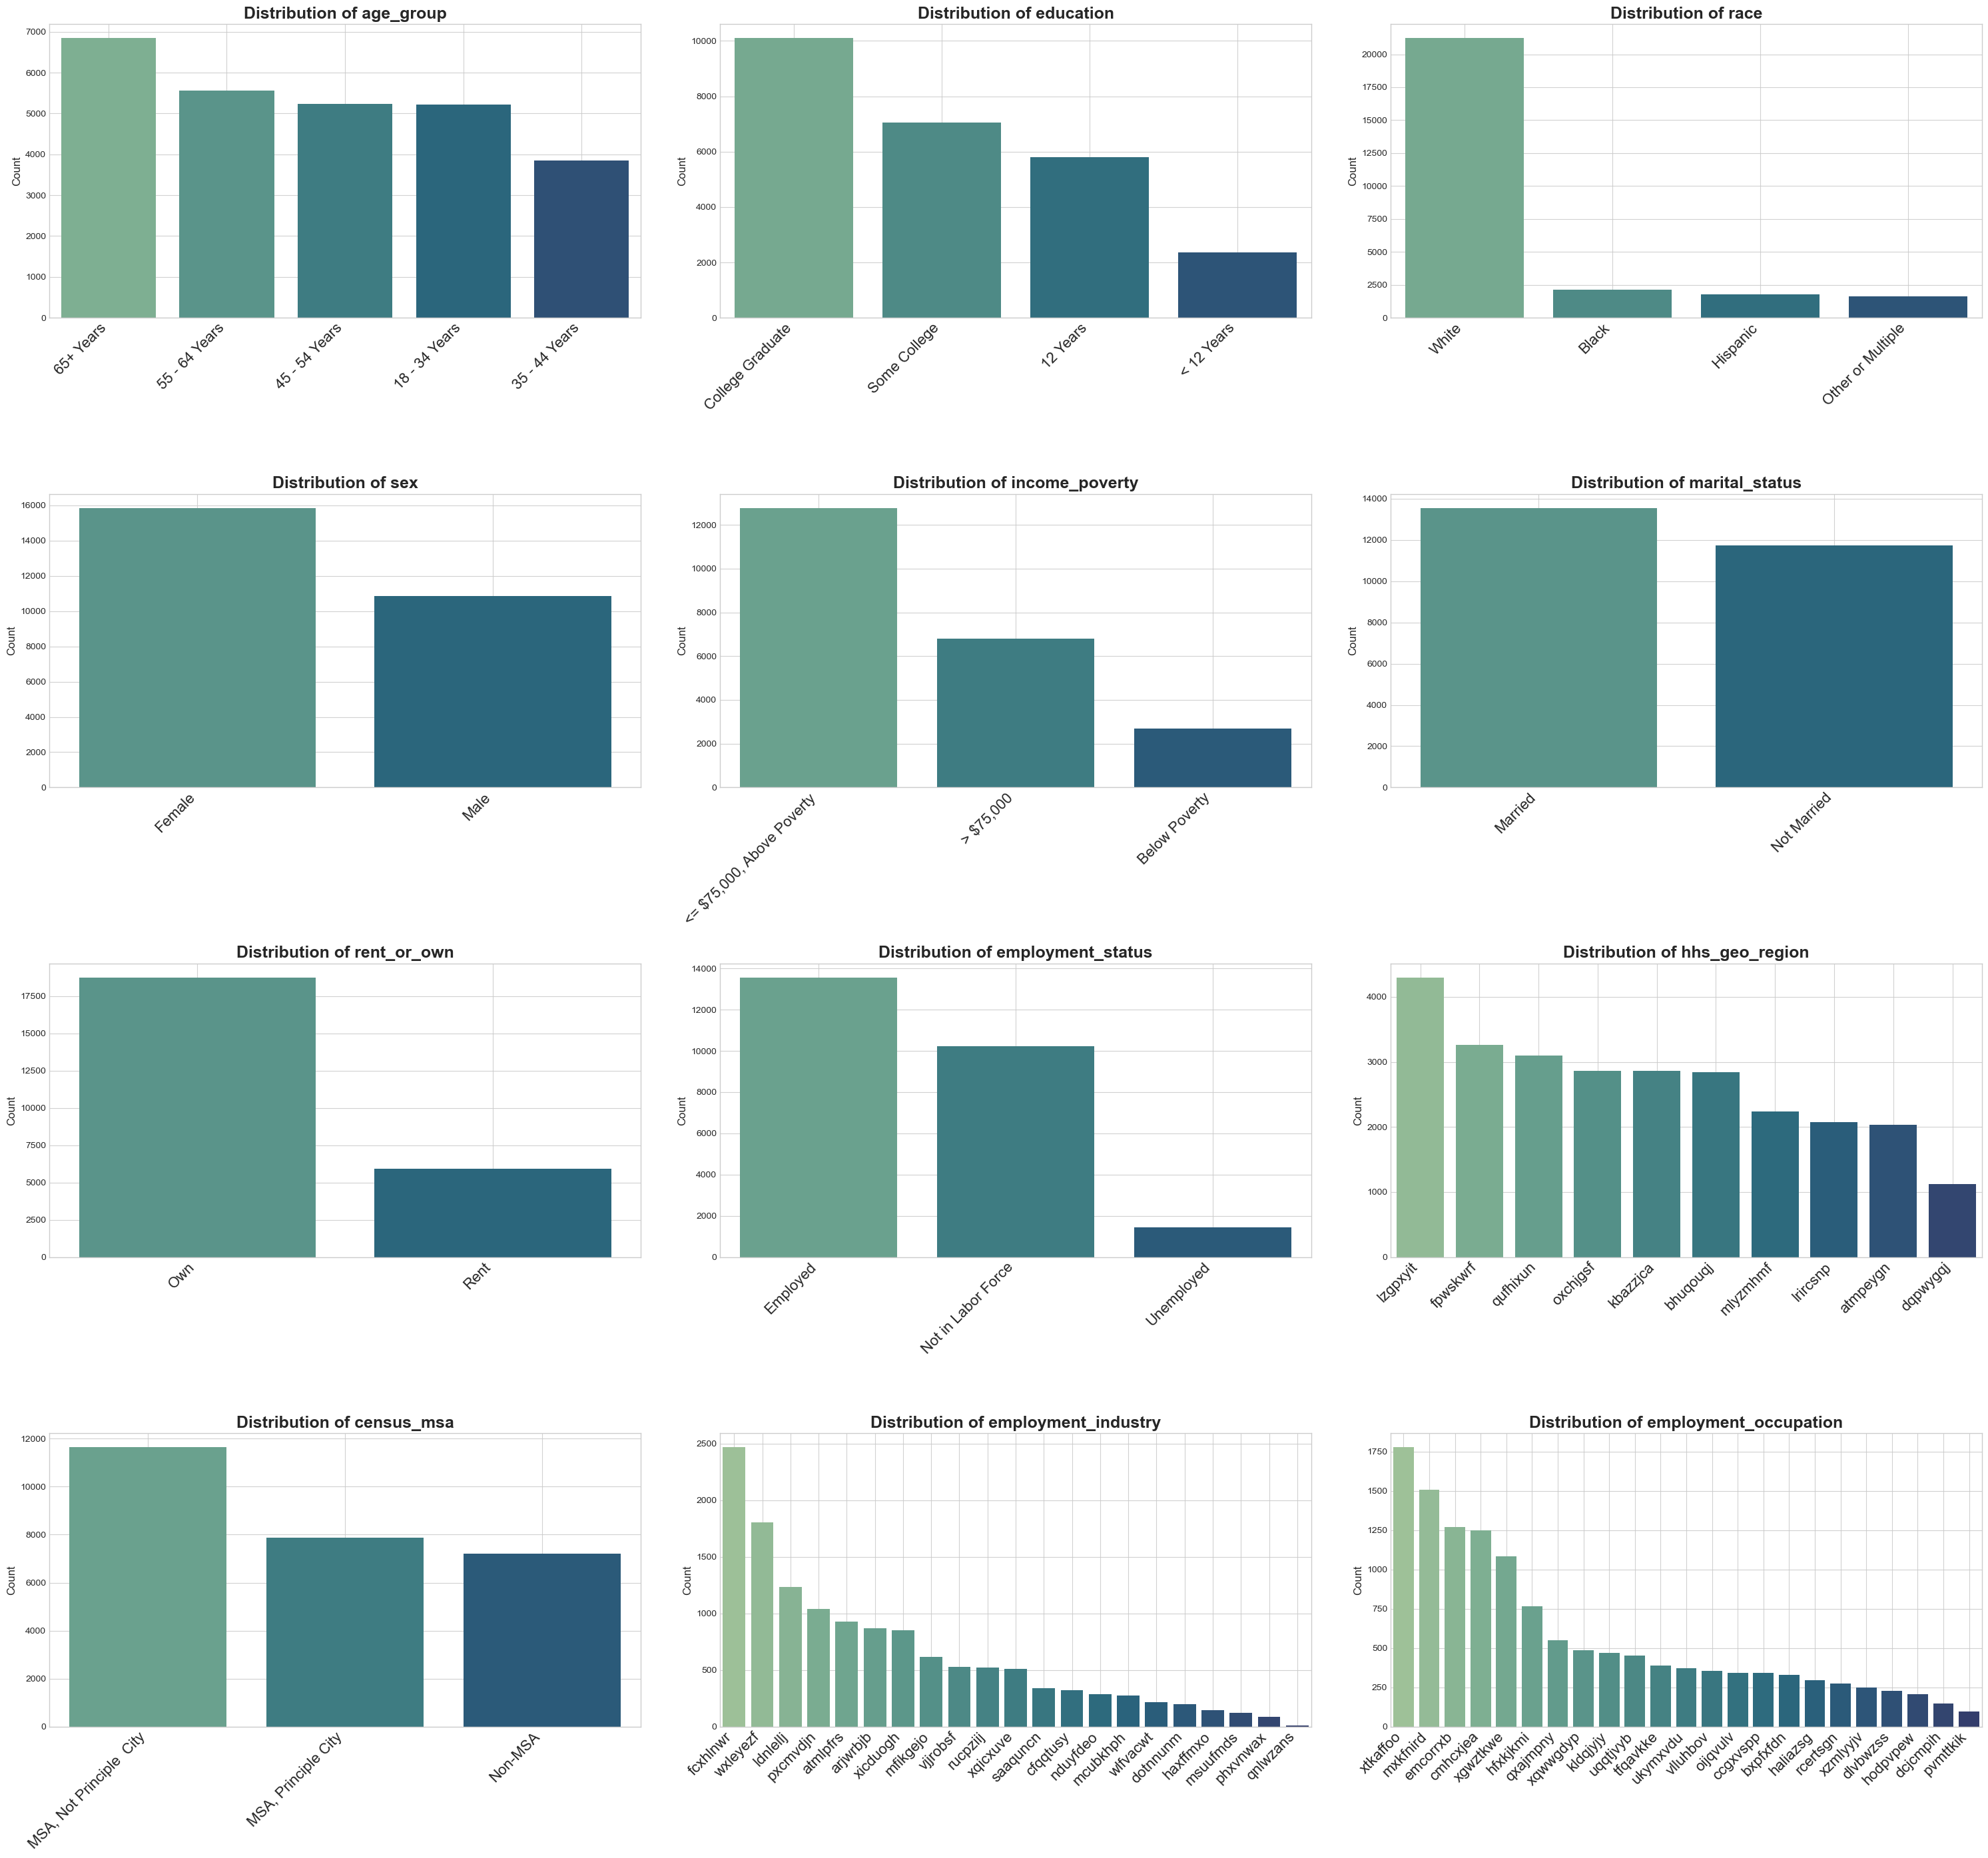

In [436]:
# Select categorical features
cat_cols = train_data.select_dtypes(include=['object']).columns

# Create grid with 4 columns
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols 

plt.figure(figsize=(30, 7 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    order = train_data[col].value_counts().index 
    sns.countplot(
        data=train_data,
        x=col,
        order=order,
        palette="crest"
    )
    plt.title(f"Distribution of {col}", fontsize=18, fontweight="bold")
    plt.xticks(rotation=45, ha="right", fontsize=16)
    plt.xlabel("")
    plt.ylabel("Count", fontsize=12)
    plt.grid(axis = 'both', alpha = 0.9)

plt.tight_layout(w_pad=2, h_pad=2)
plt.show()

*Observation:*

- Age group: The dataset is heavily tilted toward older adults (65+), so any insights may be driven by seniors.
- Education: Nearly half are college graduates.
- Race: Predominantly White (≈80%), so minority representation is thin.
- Sex: More women than men (about 60/40 split).
- Income & Poverty: Most are above the poverty line but not super wealthy (≤ $75k).
- Marital Status: Over half are married. Family context might influence patterns.
- Housing: Strong lean toward homeowners vs. renters.
- Employment: Majority are employed, though unemployment and “not in labor force” are still significant.
- Geo Region: 10 coded buckets like lzgpxyit, fpwskwrf. Unreadable gibberish unless decoded. As-is, no analytical storytelling power.
- Metro Areas (MSA): Most live in MSA but not in the principal city; suburban-heavy.
- Industry & Occupation: Sparse. Only about half the records report this, spread thinly across many categories (21 industries, 23 occupations).

**Bottom line:**

The dataset reflects an older, educated, suburban, mostly White, female, married, and employed population. But industry/occupation data is patchy, and geo codes are useless until mapped back to real names.

## DATA QUALITY CHECK

Check for duplicates

In [437]:
# Check for duplicates
duplicates = train_data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


Check for missingness in categorical features

In [438]:
# Check missing values for categorical features only
cat_missing = (
    train_data[cat_cols]
    .isnull()
    .sum()
    .to_frame("Missing Values")
    .assign(Percentage=lambda x: (x["Missing Values"] / len(train_data)) * 100)
    .sort_values("Missing Values", ascending=False)
)

# Display only categorical features with missing values
print("Categorical features missing values:\n")
print(cat_missing[cat_missing["Missing Values"] > 0])

Categorical features missing values:

                       Missing Values  Percentage
employment_occupation           13470   50.436215
employment_industry             13330   49.912008
income_poverty                   4423   16.561201
rent_or_own                      2042    7.645936
employment_status                1463    5.477965
marital_status                   1408    5.272026
education                        1407    5.268282


*Observation:*

- Employment-related fields (employment_occupation, employment_industry, employment_status) are the worst offenders. Roughly 50% of people didn’t report occupation/industry, and ~5% didn’t report employment status. 
    - Intuition: Many respondents either don’t work, prefer not to say, or skipped these questions. Could be skewed toward unemployed/retired/children.
- Income and housing (income_poverty, rent_or_own) also have notable gaps (16% and 7%). This might reflect reluctance to disclose sensitive financial info; common in surveys.
- Marital status and education have ~5% missing; moderate but still worth noting.

Check for missingness in numeric features

In [439]:
# Check missing values for numerical features only
num_cols = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_missing = (
    train_data[num_cols]
    .isnull()
    .sum()
    .to_frame("Missing Values")
    .assign(Percentage=lambda x: (x["Missing Values"] / len(train_data)) * 100)
    .sort_values("Missing Values", ascending=False)
)

# Display only numerical features with missing values
print("Numerical features missing values:\n")
print(num_missing[num_missing["Missing Values"] > 0])

Numerical features missing values:

                             Missing Values  Percentage
health_insurance                      12274   45.957989
doctor_recc_h1n1                       2160    8.087767
doctor_recc_seasonal                   2160    8.087767
chronic_med_condition                   971    3.635751
child_under_6_months                    820    3.070356
health_worker                           804    3.010447
opinion_seas_sick_from_vacc             537    2.010709
opinion_seas_risk                       514    1.924589
opinion_seas_vacc_effective             462    1.729884
opinion_h1n1_sick_from_vacc             395    1.479013
opinion_h1n1_vacc_effective             391    1.464036
opinion_h1n1_risk                       388    1.452803
household_adults                        249    0.932340
household_children                      249    0.932340
behavioral_avoidance                    208    0.778822
behavioral_touch_face                   128    0.479275
h1n1_knowled

*Observation:*

- Health insurance is the biggest gap: ~46% missing. That’s huge. Possibly many respondents don’t have insurance, or the question wasn’t applicable to them.
- Doctor recommendations (doctor_recc_h1n1, doctor_recc_seasonal) are ~8% missing. Likely only relevant to those who see doctors regularly.
- Other health-related numeric fields are mostly <5% missing. These are likely more universally answerable (like chronic_med_condition or child_under_6_months).
- Behavioral/opinion variables are barely missing (<2%), suggesting respondents are more willing/able to answer perception or behavior questions than demographic or sensitive health questions.

# DATA PREPARATION

Before diving into EDA or modeling, it is crucial to clean, transform, and engineer the dataset to ensure optimal performance of machine learning algorithms and accurate insight generation. The following steps outline a comprehensive data preparation workflow:

* Data Cleaning/Wrangling
* Feature Transformation
* Feature Engineering
* Target Preparation
* Final Dataset Check

Since my focus is currently EDA, I will save the modeling steps for later.

## DATA WRANGLING
- **Drop unnecessary columns:** Drop those that have very limited analytical or modelling value. (e.g unique identifiers) and any redundant columns.
- **Standarise categorical values:** Remove any leading and trailing white spaces for categorical values and make them all lower-case.
- **Handle missing values**: Decide whether to impute, drop, or treat missing values as a separate category.
- **Correct data types**: Ensure numerical columns are indeed numeric and categorical columns are of type category, object or string. This has already been verified.
- **Remove duplicates**: The dataset is clean; 0 duplicated values.
- **Variable Analysis**: Carry out variable analysis (Univariate, Bivariate and Multivariate)

I will do this cleaning excercise on the training data in tandem with the test data.

Now to drop unnecessary columns and those that contain more than 45% missing values.

In [440]:
# Drop columns that are more than 45% missing
cols_to_drop = ['employment_industry', 'employment_occupation', 'health_insurance']
train_data.drop(columns=cols_to_drop, inplace=True)

### CLEANING CATEGORICAL FEATURES

To maintain data consistency and minimize distortion, missing values in categorical variables will be imputed using their most frequent category (mode). This ensures each feature retains its natural distribution without introducing synthetic bias from model-based imputation or using placeholders.

In [441]:
# Get categorical columns again after dropping
cat_cols = train_data.select_dtypes(include=['object']).columns

# Loop through categorical columns and fill missing values with mode
for col in cat_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Sanity check
train_data[cat_cols].isnull().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

### CLEANING NUMERICAL FEATURES

The first step is to isolate numerical columns containing only binary values (0/1). These variables will be imputed using the mode, ensuring that missing values are filled with the most frequent class and preserving the original categorical nature of the data.

In [442]:
# Select numerical columns
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Find and print binary columns (0/1)
binary_cols = []
print("Binary numerical columns:\n")
for col in num_cols:
    unique_vals = set(train_data[col].dropna().unique())
    if unique_vals.issubset({0, 1}):
        binary_cols.append(col)
        print(col)

# Impute binary numerical columns with mode
for col in binary_cols:
    mode_val = train_data[col].mode()[0]
    train_data[col].fillna(mode_val, inplace=True)

Binary numerical columns:

behavioral_antiviral_meds
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_large_gatherings
behavioral_outside_home
behavioral_touch_face
doctor_recc_h1n1
doctor_recc_seasonal
chronic_med_condition
child_under_6_months
health_worker
h1n1_vaccine
seasonal_vaccine


In [443]:
# Missingness in binary columns after imputation
print("Missing values in binary columns after imputation:\n")
print(train_data[binary_cols].isnull().sum())

Missing values in binary columns after imputation:

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
h1n1_vaccine                   0
seasonal_vaccine               0
dtype: int64


For the remaining non-binary numerical columns, missing values will be imputed using the median. This approach preserves the central tendency of each feature while remaining robust to skewness and outliers.

In [444]:
# Get non-binary numerical columns
non_binary_cols = [col for col in num_cols if col not in binary_cols]

# Print non-binary numerical columns
print("Non-binary numerical columns:")
for col in non_binary_cols:
    print(col)

# Impute with median
for col in non_binary_cols:
    median_val = train_data[col].median()
    train_data[col].fillna(median_val, inplace=True)

# Missingness check after imputation
print("\n" + "=" * 70)
print("\nMissing values in non-binary numerical columns after imputation:\n")
print(train_data[non_binary_cols].isnull().sum())

Non-binary numerical columns:
h1n1_concern
h1n1_knowledge
opinion_h1n1_vacc_effective
opinion_h1n1_risk
opinion_h1n1_sick_from_vacc
opinion_seas_vacc_effective
opinion_seas_risk
opinion_seas_sick_from_vacc
household_adults
household_children


Missing values in non-binary numerical columns after imputation:

h1n1_concern                   0
h1n1_knowledge                 0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64


# EXPLORATORY DATA ANALYSIS (EDA)

With the dataset cleaned and missing values addressed, the next step is to perform Exploratory Data Analysis (EDA). The goal of this phase is to:

- Understand the distribution of variables (both numerical and categorical).
- Identify patterns, trends, and relationships among features.
- Detect potential outliers, anomalies, or biases.
- Generate insights that will guide feature engineering and modeling strategies.

EDA serves as the bridge between raw data and modeling, helping uncover the underlying structure of the dataset while validating assumptions.

This will be done in 3 phases:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

## UNIVARIATE ANALYSIS

Univariate analysis focuses on examining each variable individually to understand its distribution, central tendency, and variability. This step helps:
- Highlight the shape of the data (normal, skewed, uniform, etc.).
- Detect outliers or unusual values.
- Provide context for later bivariate and multivariate analysis.
- Guide feature transformation and encoding decisions.

By analyzing variables in isolation, we establish a clear baseline understanding of the dataset before moving on to feature interactions.

### NUMERICAL COLUMNS

#### 1. doctor_recc_h1n1 

Doctor Recommendations for H1N1 Vaccine:

No Recommendation: 21,299 respondents (79.8%)
Recommended: 5,408 respondents (20.2%)



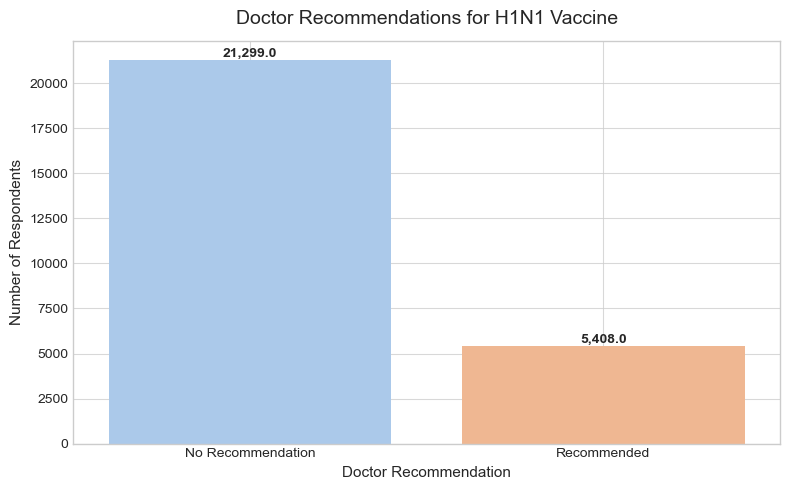

In [ ]:
# Work on a copy
df_recc_h1n1 = train_data.copy()

# Make variable datatype to int
df_recc_h1n1['doctor_recc_h1n1'] = df_recc_h1n1['doctor_recc_h1n1'].astype(int)

# Map values to human-readable labels
label_map = {0: "No Recommendation", 1: "Recommended"}
df_recc_h1n1['doctor_recc_h1n1_label'] = df_recc_h1n1['doctor_recc_h1n1'].map(label_map)

# Get value counts and percentages
counts = df_recc_h1n1['doctor_recc_h1n1_label'].value_counts()
percentages = df_recc_h1n1['doctor_recc_h1n1_label'].value_counts(normalize=True) * 100

# Print intuitive summary
print("Doctor Recommendations for H1N1 Vaccine:\n")
for label, count in counts.items():
    print(f"{label}: {count:,} respondents ({percentages[label]:.1f}%)")

print()

# Visualise distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df_recc_h1n1, 
    x='doctor_recc_h1n1_label', 
    order=counts.index,
    palette='pastel'
)

# Add counts only on bars
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count:,}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Doctor Recommendations for H1N1 Vaccine', fontsize=14, pad=12)
plt.xlabel('Doctor Recommendation', fontsize=11)
plt.ylabel('Number of Respondents', fontsize=11)

# Tighten it all up
plt.grid(axis='both', alpha=0.75)
plt.tight_layout()
plt.show()

*Observation:*

- The overwhelming majority of respondents (nearly 80%) reported that their doctor did not recommend the H1N1 vaccine. Only about 1 in 5 received a doctor’s recommendation.

This suggests that doctor guidance was limited, and the relatively small proportion of medical endorsements could have had a strong influence on overall vaccine uptake in the population.


#### 2. doctor_recc_seasonal

Doctor Recommendations for Seasonal Flu Vaccine:

No Recommendation: 18,613 respondents (69.7%)
Recommended: 8,094 respondents (30.3%)



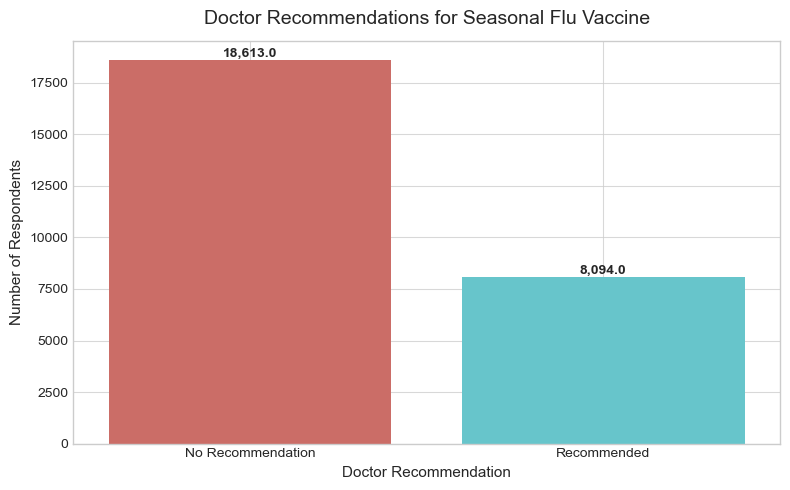

In [452]:
# Work on a copy
df_recc_seasonal = train_data.copy()

# Make variable datatype to int
df_recc_seasonal['doctor_recc_seasonal'] = df_recc_seasonal['doctor_recc_seasonal'].astype(int)

# Map values to human-readable labels
label_map = {0: "No Recommendation", 1: "Recommended"}
df_recc_seasonal['doctor_recc_seasonal_label'] = df_recc_seasonal['doctor_recc_seasonal'].map(label_map)

# Get value counts and percentages
counts = df_recc_seasonal['doctor_recc_seasonal_label'].value_counts()
percentages = df_recc_seasonal['doctor_recc_seasonal_label'].value_counts(normalize=True) * 100

# Print intuitive summary
print("Doctor Recommendations for Seasonal Flu Vaccine:\n")
for label, count in counts.items():
    print(f"{label}: {count:,} respondents ({percentages[label]:.1f}%)")

print()

# Visualise distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df_recc_seasonal, 
    x='doctor_recc_seasonal_label', 
    order=counts.index,
    palette='hls'
)

# Add counts only on bars
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count:,}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Doctor Recommendations for Seasonal Flu Vaccine', fontsize=14, pad=12)
plt.xlabel('Doctor Recommendation', fontsize=11)
plt.ylabel('Number of Respondents', fontsize=11)

# Tighten it all up
plt.grid(axis='both', alpha=0.75)
plt.tight_layout()
plt.show()

*Observation:*

- For the seasonal flu vaccine, about 7 in 10 respondents reported receiving no recommendation from their doctor. Only 30% were advised to get the shot.

Compared to H1N1, the share of doctor recommendations is higher, but still shows that the majority of people weren’t directly encouraged by a healthcare provider. This gap suggests that doctors’ voices weren’t consistently leveraged, despite their strong influence on vaccine decisions.